In [9]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#loading the data and converting the data and label list into numpy arrays
data_dict = pickle.load(open('./data.pickle', 'rb'))
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

#splitting the datasets into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Creating the model using random forest classifier and training the model with the training dataset
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Making predictions on new data points
y_predict = model.predict(x_test)
# Computing the accuracy of the model
score = model.score(x_test, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))
f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()

99.86754966887416% of samples were classified correctly !


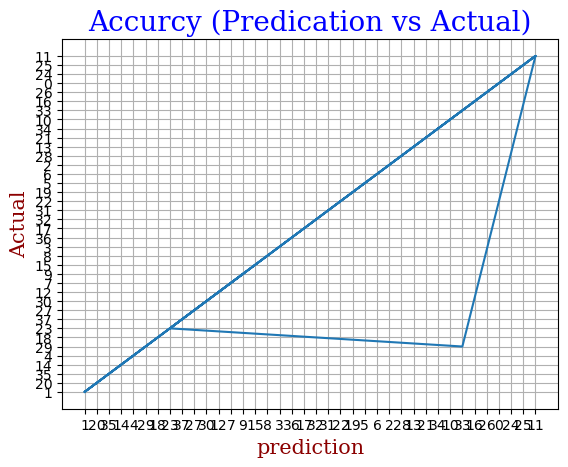

In [10]:
import matplotlib.pyplot as plt

target_names= [ 'A',  'B',  'C',  'D',  'E',  'F',  'G',  'H',  'I',  'K',  'L',  'M',  'N',  'O',  'P', 'Q',  'R',  'S',  'T',  'U', 'V',  'W',  'X', 'Y', 'J',  'Z',  'space ', '0',  '1',  '2',  '3',  '4',  '5',  '6', '7',  '8', '9','10']
plt.plot(y_predict,y_test)
font1={'family':'serif','color':'blue','size':20}
font2={'family':'serif','color':'darkred','size':15}
plt.title('Accurcy (Predication vs Actual)',fontdict=font1)
plt.xlabel('prediction',fontdict=font2)
plt.ylabel('Actual',fontdict=font2)
plt.grid(True)
plt.show()

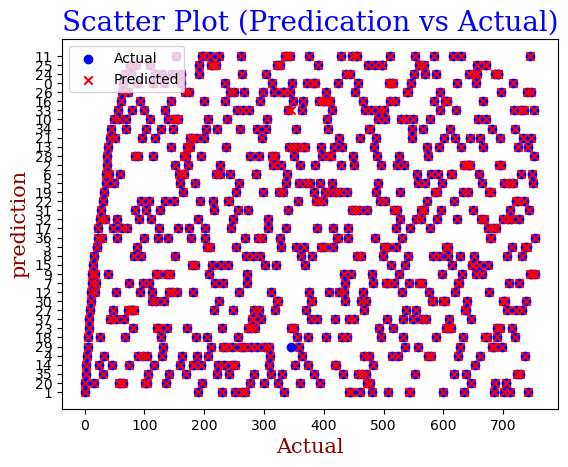

In [11]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_predict)), y_predict, color='red', label='Predicted', marker='x')
plt.title('Scatter Plot (Predication vs Actual)',fontdict=font1)
plt.ylabel('prediction',fontdict=font2)
plt.xlabel('Actual',fontdict=font2)
plt.legend()

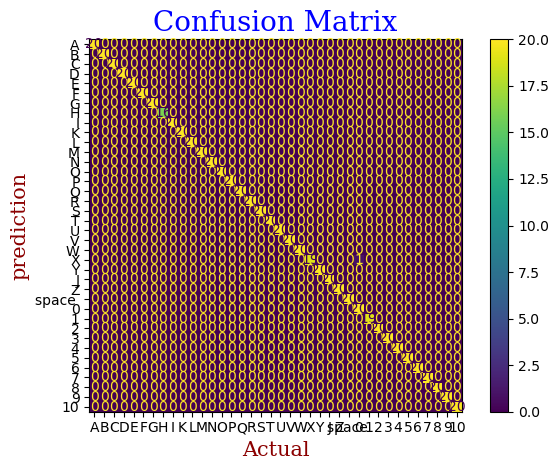

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# print(classification_report(y_test, y_predict, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    model, x_test, y_test, display_labels=target_names, xticks_rotation=360
)
plt.title('Confusion Matrix',fontdict=font1)
plt.ylabel('prediction',fontdict=font2)
plt.xlabel('Actual',fontdict=font2)
plt.tight_layout()
plt.show()